## Unsupervised Machine Learning -Kmeans, Hierarchical Clustering**

### What is mean by Unsupervised Machine Learning ?

In Unsupervised Learning We are not interested in prediction, because we do not have an associated response variable Y.Unsupervised learning cannot be directly applied to a regression or classification problem because unlike supervised learning,we have the input data but no corresponding output data. The goal of unsupervised learning is to find the underlying structure of dataset, group that data according to similarities, and represent that dataset in a compressed format.

### Clustering

Clustering refers to a very broad set of techniques for finding subgroups, or clustering clusters, in a data set.
When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within
each group are quite similar to each other, while observations in different groups are quite different from each other.

### K-means Clustering

K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters.
To perform K-means clustering, we must first specify the desired number of clusters K; then the K-means algorithm will assign
each observation to exactly one of the K clusters.

**Steps to perform K-means**  
1)Choosing the number of clusters.  
2)Initializing centroids.   
3)Assign data points to the nearest cluster.   
4)Re-initialize centroids.   
5)Repeat steps 3 and 4.    


**Performing k_means Clustering**

**Importing Libraries**

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df1=pd.read_csv('Mall_customers.csv')
df1.head()
#type(df1['Annual income(k$)'])


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Dataset Information**

- CustomerID: It is the unique ID given to a customer
- Gender: Gender of the customer
- Age: The age of the customer
- Anuual Income: It is the annual income of the customer
- Spending Score (1-100): It is the score(out of 100) given to a customer by the mall authorities,based on the money spend and    the behavior of the customer

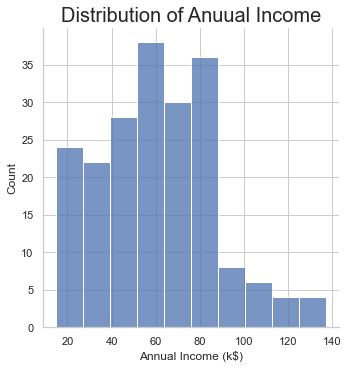

In [3]:
sns.set(style='whitegrid')
sns.displot(df1['Annual Income (k$)'])
plt.title('Distribution of Anuual Income',fontsize=20)
plt.xlabel=('Range of Anuual Income')
plt.ylabel=('count')
plt.show()

**Most of the annual income falls between 50k to 80k**
**Anuual income of the people are positively skewed**

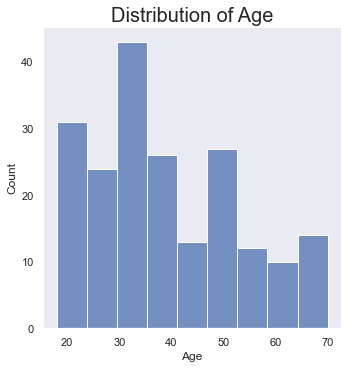

In [4]:
sns.set(style='dark')
sns.displot(df1['Age'])
plt.title('Distribution of Age',fontsize=20)
plt.xlabel=('Range of Age')
plt.ylabel=('count')
plt.show()

**There are customers of wide variety of ages. The age group between 30-40 are more spending the mall**

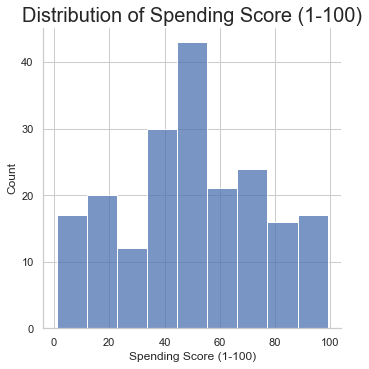

In [5]:
sns.set(style='whitegrid')
sns.displot(df1['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)',fontsize=20)
plt.xlabel=('Range of Spending Score (1-100)')
plt.ylabel=('count')
plt.show()

In [ ]:
**The maximum spending score is in the range 40 to 60.They are normally distributed**

In [6]:
df1['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

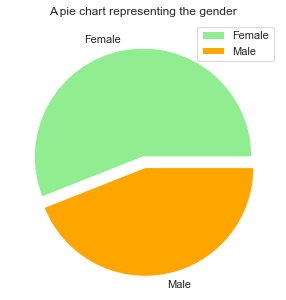

In [7]:
labels=['Female','Male']
size=[112,88]
colors=['lightgreen','orange']
explode=[0,0.1]
plt.rcParams['figure.figsize']=(5,5)
plt.pie(size,colors=colors,explode=explode, labels=labels)
plt.title('A pie chart representing the gender')
plt.axis('off')
plt.legend()
plt.show()

**Proportion of Female is more spending than male**

In [8]:
df1.isnull().sum()    #To check null value in given data.

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Scatterplot of all variables**

In [9]:
X=df1.iloc[:,[3,4]].values   # Take 2 columns Annual income and Spending scores

In [38]:
#X=df1['Annual Income (k$)']+df1['Spending Score (1-100)']

In [12]:
y=df1.drop(['CustomerID','Genre','Annual Income (k$)'],axis=1) 

we used elbow curve to choose what is the value of k?

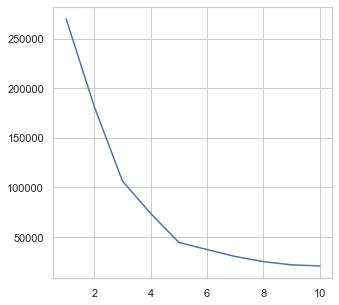

In [13]:
#for choosing k
sse=[]
k_rng=range(1,11)
for k in k_rng:
    km=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(range(1, 11), sse)
plt.title="The Elbow Method"
plt.xlabel="Number of clusters"
plt.ylabel="SSE"
plt.grid(True)
plt.show()
    

From the above graph we see that elbow curve is bent at k=5, Hence we choose k=5.  
The elbow method is a method of interpretation and validation of interpretation and validation of consistency within_cluster
analysis designed to help to find the appropriate number of clusters in a dataset.
It is clear from the figure that we should take the number of cluster equal to 5,as a slope of curve is not steep enough after
it.

In the above graph, the point after which the slope is getting decreased is called the elbow point.

In [14]:
km=KMeans(n_clusters=5,init='k-means++',random_state=10)
y_kmeans=km.fit_predict(X)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [18]:
km.cluster_centers_    # This are the centroid of 3 clusters

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

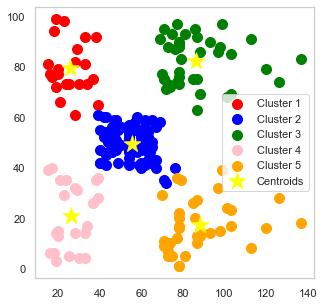

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'Orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'Yellow', marker='*',label = 'Centroids')
plt.title='Clusters of K Means clustring'
plt.xlabel='Anuual Income'
plt.ylabel='Spending Score'
plt.legend()
plt.grid()
plt.show()

From the above scatterplot we can see visualize different clusters among anuual income and total spending scores. There is a total spending scores. There is a total of 5 clusters are created in this scatter plot and the yellow points are the centroid of the 5 clusters.  
We can see that the mall customers can be broadly grouped into 5 groups based on their purchases made in the mall.  

In cluster 4(pink color) we can we can see people have low annual income and low spending scores, this is quite reasonable 
as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The
mall will be least interested in people belonging to this cluster.  

In cluster 1(red colored) we can see that people have low income but higher spending scores, these ae those people who for some reason love to buy products more often even though thy have a low income. Maybe it's because these people ae more than satisfied with the mall services.  

In cluster 2(blue colored) we can see that people have average income and an average spending score, these people again will not the prime targets of the mall, but again they will be considered and other data analysis techniques may be used to increase 
their spending score.

In cluster 3(green color) we see that people have high income and high spending scores, this is the ideal case for the mall as these people are the pime sources of profit. These people might be the regular customers of the mall and are convinced by 
the mall's facilities.

In cluster 5(orange color) we see that people have high income but low spending scores, this is interesting. maybe these are the people who are unsatisfied or unhappy by the mall's services. These can be the prime targets of the mall, as they havethe potential to spend money. So,the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.  

### Hierarchical clustering Analysis

One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters K. 
Hierarchical clustering is an alternative approach which does not require that we commit to a particular choice of K. 
Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based 
representation of the observations, called a dendrogram.   
There are two types of Hierarchical Clustering.   
**1)Agglomerative Hierarchical Clustering.**  
**2) Divisive Hierarchical Clustering**

**1)Agglomerative Hierarchical Clustering.**  
**It is Bottom Up approach where each observation starts in its own clusters are merged as one moves up hierarchy.**

**Linkage Criterion**  
**1) Single-Linkage:- Single linkage is the shortest distance between a pair of observations in two clusters.**

In [60]:
df1_1= df1.iloc[:,[3,4]].values  
scaled_df1_1 = scaler.fit_transform(df1_1)

**Single linkage will produce the dendograms which are not in structured manner.**

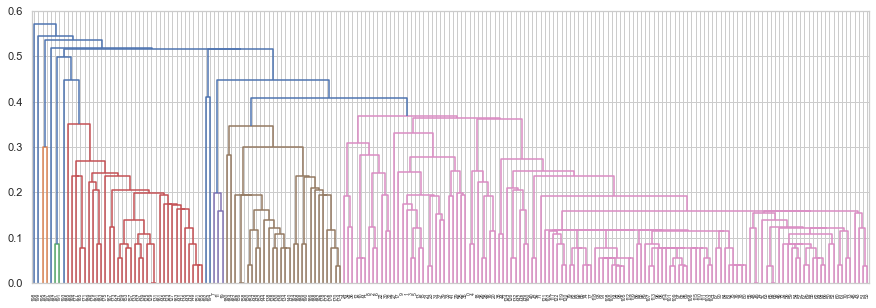

In [104]:
plt.figure(figsize=(15,5))
plt.title="Single Linkage Criterion"
dend = sch.dendrogram(sch.linkage(scaled_df1_1, method='single'))
plt.xlabel='Annual Incoe'
plt.ylabel='ecludian distance'

**2) Complete-Linkage :- Complete linkage is the farthest linkage is the farthest distance between a pair of observations 
in two clusters.**

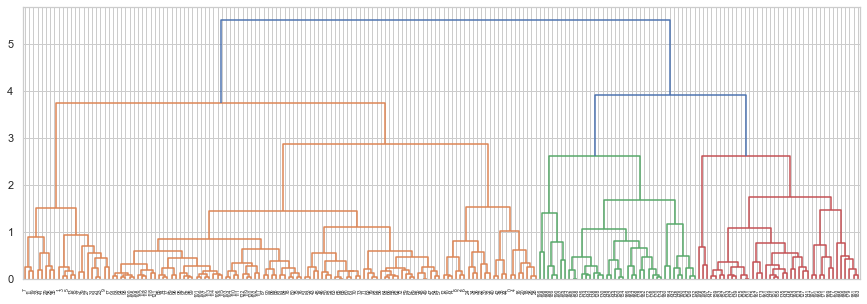

In [69]:
plt.figure(figsize=(15,5))
plt.title="complete linkage Dendograms"
dend = sch.dendrogram(sch.linkage(scaled_df1_1, method='complete'))
plt.xlabel='Annual Income'
plt.ylabel='Euclidean Distance'

**3) Average-Linkage:- Average linkage is the distance between each observation in one cluster to every observation 
    in other clusters**

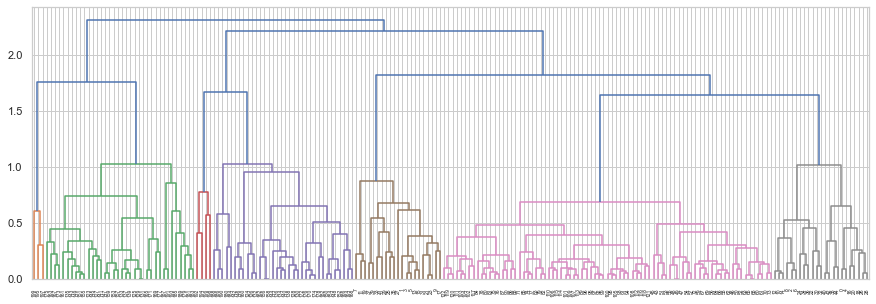

In [68]:
plt.figure(figsize=(15,5))
plt.title="Avearge linkage  Dendograms"
dend = sch.dendrogram(sch.linkage(scaled_df1_1, method='average'))
plt.xlabel='Annual Income($)'
plt.ylabel='Euclidean Distance'

**The Average linkage produce dendogram which are in tree manner**

**4)Ward's-linkage :- It is a mininum variance method that calculates the distance between two clusters as increase in the 
minimum sum of squares after merging the two clusters into single clusters.**  
**Ward's Linakge criteria is the default option.to choose linkage criterion.**

<function matplotlib.pyplot.show(close=None, block=None)>

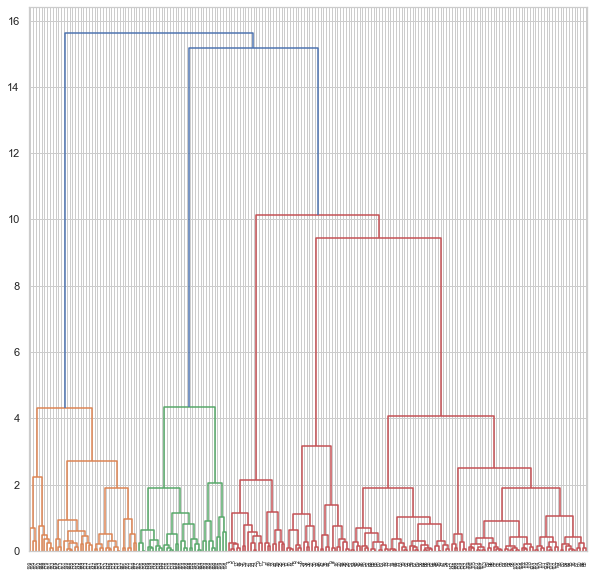

In [70]:
X=df1.iloc[:,[3,4]].values
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram=sch.dendrogram(sch.linkage(scaled_df1_1,method='ward'))
plt.title='dendrogram'
plt.xlabel='Annual Income'
plt.ylabel='Euclidean distances'
plt.show

We can extract the optimal number of clusters by looking the dendogram.By looking the dendogram, we say that optimal no of 
clusters is 5.
We can say that for above four method the wald method is best method.  
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clusterig The main use of a dendrogram is to work out the best way to allocate objects to clusters the 
dendrogram above shows the hierarchical clustering of different observations shows on the scatterplot.

### Fit the model

In [73]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [74]:
# Fit and predict to have the cluster labels.

y_pred =AC.fit_predict(df1_1)
y_pred
#y_pred1=np.array(y_pred).tolist()

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [47]:
#plt.figure(figsize=(10,5))
#sns.boxplot(x='y_pred', y='Murder', data=data_1)

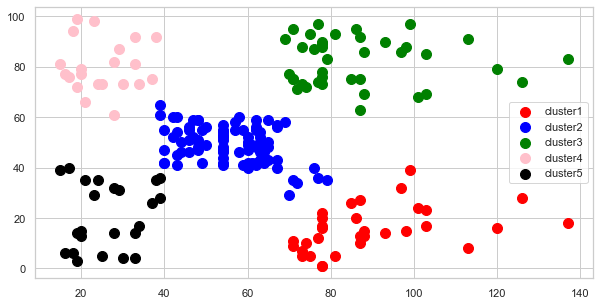

In [75]:
plt.figure(figsize=(10,5))
plt.scatter(df1_1[y_pred==0, 0], df1_1[y_pred==0, 1], s=100, c='red', label ='cluster1')
plt.scatter(df1_1[y_pred==1, 0], df1_1[y_pred==1, 1], s=100, c='blue', label ='cluster2')
plt.scatter(df1_1[y_pred==2, 0], df1_1[y_pred==2, 1], s=100, c='green', label ='cluster3')
plt.scatter(df1_1[y_pred==3, 0], df1_1[y_pred==3, 1], s=100, c='pink', label ='cluster4')
plt.scatter(df1_1[y_pred==4, 0], df1_1[y_pred==4, 1], s=100, c='black', label ='cluster5')
plt.xlabel='Annual Income'
plt.ylabel='Spending Scores'
plt.legend()
plt.show()

**Here we can visualize the five clusters here.**  
From the above scatterplot we can visualize different clusters among anuual income and total spending score. There is a total of 5 clusters are created in this scatter plot and the and here no centroid point.  
In cluter 4(black color) we can see people have low annual income and low spending scores.